## Here we are creating a (.env) file to hide our API_KEY and API_ID

In [29]:
import pandas as pd
import requests
import os
from dotenv import load_dotenv
import matplotlib.pyplot as plt
import seaborn as sns
import time


# Loading vairable from .env
load_dotenv()

#Getting them on this file

API_ID = os.getenv("ADZUNA_APP_ID")
API_KEY = os.getenv("ADZUNA_APP_KEY")

## Now we are calling the API key to extract data from the web database to our pandas dataframe(df)

In [30]:
i = 1
url = f"https://api.adzuna.com/v1/api/jobs/gb/search/{i}?app_id={API_ID}&app_key={API_KEY}&results_per_page=20&what=javascript%20developer&content-type=application/json"
final_df = pd.DataFrame()

for i in range (1,21,1):
    response = requests.get(url)  # here the response variable is a object. Then in the next line we are converting response variable into json type.
    temp_data = response.json()['results']
    temp_df = pd.json_normalize(temp_data)
    final_df = pd.concat([final_df,temp_df],ignore_index=True)
    time.sleep(1)


    

AttributeError: 'DataFrame' object has no attribute 'extend'

In [19]:
final_df= final_df[['title','company.display_name','created','location.display_name','salary_max','salary_min','category.label']]

# Now we are doing some EDA(Exploratory data analysis) to better understand the data we are working on

In [20]:
sns.set(style="whitegrid", palette="muted", font_scale=1.1)
print("Shape of dataset:", final_df.shape)
print("\nColumns:", final_df.columns.tolist())
print("\nMissing values:\n", final_df.isna().sum())

Shape of dataset: (20, 7)

Columns: ['title', 'company.display_name', 'created', 'location.display_name', 'salary_max', 'salary_min', 'category.label']

Missing values:
 title                    0
company.display_name     0
created                  0
location.display_name    0
salary_max               0
salary_min               0
category.label           0
dtype: int64



Top Job Titles:
 title
Fullstack Javascript Developer                                           3
Senior Fullstack Javascript Developer                                    3
Javascript Developer                                                     2
Senior JavaScript Developer                                              2
JavaScript Developer - Hybrid Remote                                     2
JavaScript Developer - Hybrid (Manchester )                              1
Full-Stack Javascript Developer – Central London (IT)                    1
JavaScript Developer                                                     1
Java with Javascript Developer - Financial Systems - East London (IT)    1
Front End Javascript Developer with Agile – Brighton Sussex (IT)         1
Name: count, dtype: int64


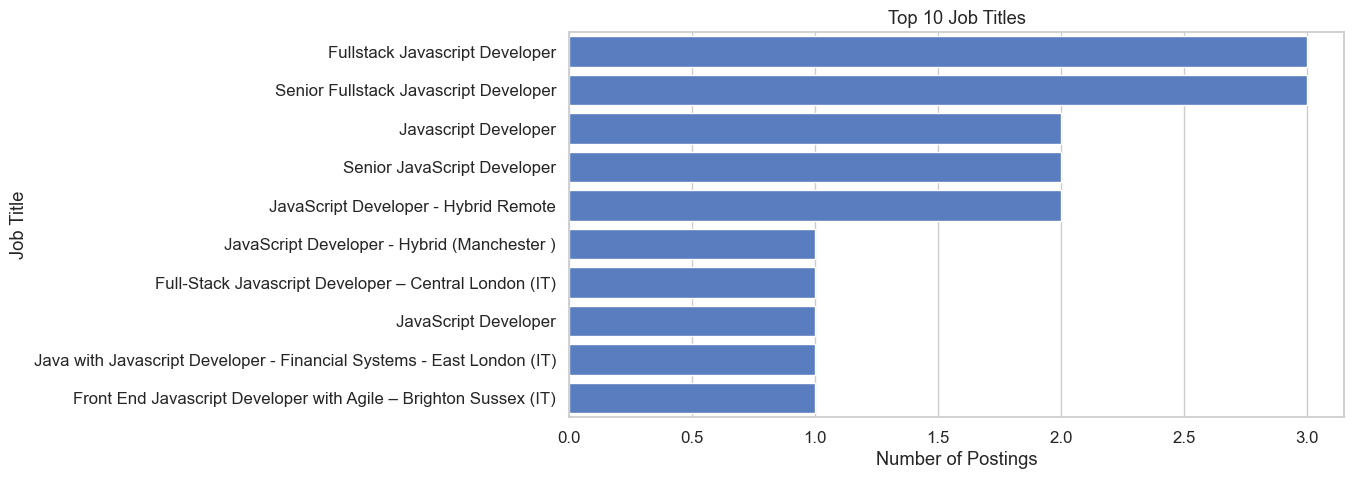

In [24]:
# --- 2. Salary Preprocessing ---
avg_salary = (final_df["salary_min"] + final_df["salary_max"]) / 2


# --- 3. Top Job Titles ---
top_titles = final_df["title"].value_counts().head(10)
print("\nTop Job Titles:\n", top_titles)

plt.figure(figsize=(10,5))
sns.barplot(y=top_titles.index, x=top_titles.values)
plt.title("Top 10 Job Titles")
plt.xlabel("Number of Postings")
plt.ylabel("Job Title")
plt.show()